In [16]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [2]:
# Load the Boston dataset
# Loading and Preprocessing the Dataset
boston_data_path = 'boston_house_prices.csv'
boston = pd.read_csv(boston_data_path, header=1)

# Assuming the target variable is in a column named 'MEDV'
X_boston = boston.drop('MEDV', axis=1)
y_boston = boston['MEDV']

# Split the dataset into training and test sets
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

In [4]:
# Linear Regression (MLR) on Boston Housing dataset
mlr = LinearRegression()
mlr.fit(X_train_boston, y_train_boston)
mlr_pred = mlr.predict(X_test_boston)


MLR Accuracy on Test Set: 0.8627450980392157
MLR AUC on Test Set: 0.9492203118752498
Confusion Matrix (MLR) on Test Set:
[[50 11]
 [ 3 38]]
Classification Error (MLR) on Test Set: 0.13725490196078427


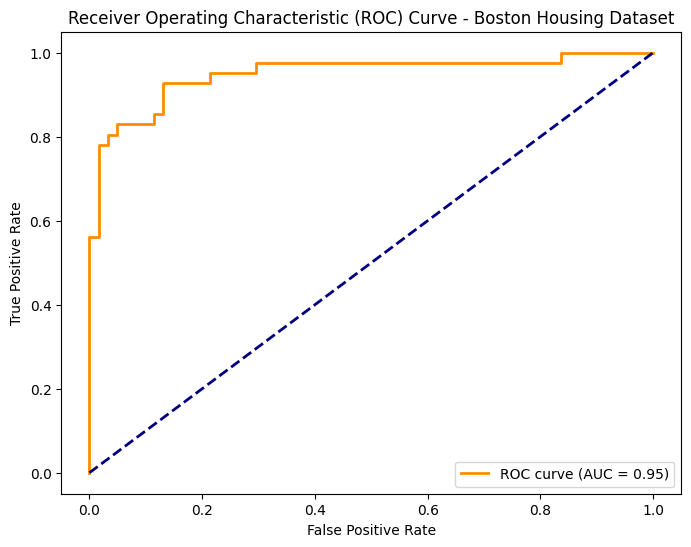

In [17]:
# Scaling features to [0, 1] range
scaler = MinMaxScaler()
X_test_boston_scaled = scaler.fit_transform(X_test_boston)

# Predicting probabilities
mlr_prob = mlr.predict(X_test_boston)

# Binarize the output
y_test_boston_binary = (y_test_boston > y_test_boston.mean()).astype(int)

# Accuracy
mlr_accuracy = accuracy_score(y_test_boston_binary, (mlr_prob > mlr_prob.mean()).astype(int))
print("MLR Accuracy on Test Set:", mlr_accuracy)

# AUC
fpr, tpr, thresholds = roc_curve(y_test_boston_binary, mlr_prob)
mlr_auc = auc(fpr, tpr)
print("MLR AUC on Test Set:", mlr_auc)

# Confusion Matrix
mlr_conf_matrix = confusion_matrix(y_test_boston_binary, (mlr_prob > mlr_prob.mean()).astype(int))
print("Confusion Matrix (MLR) on Test Set:")
print(mlr_conf_matrix)

# Classification Error
mlr_classification_error = 1 - mlr_accuracy
print("Classification Error (MLR) on Test Set:", mlr_classification_error)

# Plot ROC curve for MLR on Boston dataset
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(mlr_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Boston Housing Dataset')
plt.legend(loc="lower right")
plt.show()